In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Auto-Encoder

In [ ]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

### Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/ai4i2020.csv')

In [ ]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


### Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
data.shape

(10000, 14)

In [ ]:
data = data.drop(columns = ['UDI',	'Product ID',	'Type'])
data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
data.isnull().sum()

Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [ ]:
features = data.loc[:,['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
features

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


In [ ]:
features.index = pd.date_range("2023-01-01", periods=10000, freq="H")

features

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
2023-01-01 00:00:00,298.1,308.6,1551,42.8,0
2023-01-01 01:00:00,298.2,308.7,1408,46.3,3
2023-01-01 02:00:00,298.1,308.5,1498,49.4,5
2023-01-01 03:00:00,298.2,308.6,1433,39.5,7
2023-01-01 04:00:00,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
2024-02-21 11:00:00,298.8,308.4,1604,29.5,14
2024-02-21 12:00:00,298.9,308.4,1632,31.8,17
2024-02-21 13:00:00,299.0,308.6,1645,33.4,22
2024-02-21 14:00:00,299.0,308.7,1408,48.5,25


### VISUALIZATION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

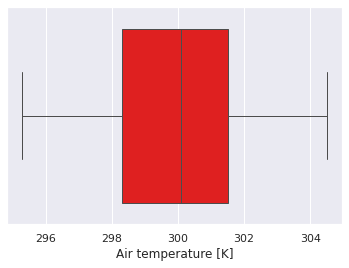

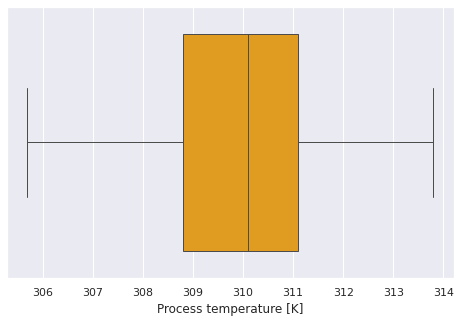

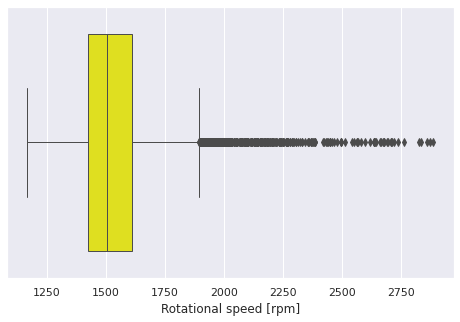

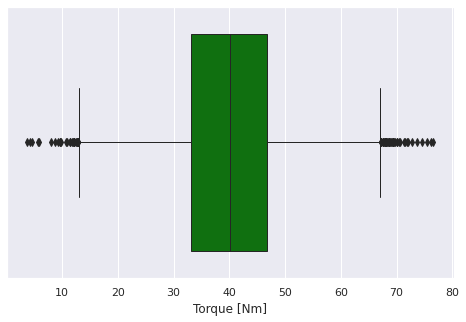

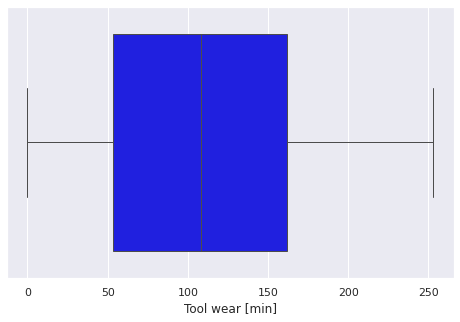

In [ ]:
#BOXPLOT

c = ['red', 'orange', 'yellow', 'green', 'blue']
j=0
for i in features.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    sns.boxplot(features[i] , linewidth= 1.0, color=c[j])
    j=j+1

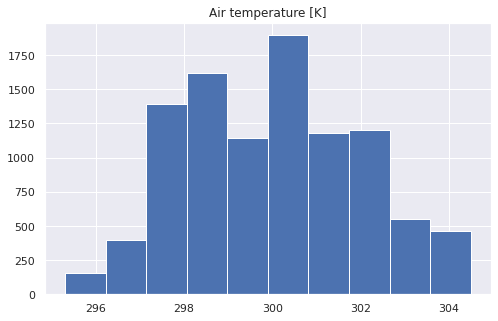

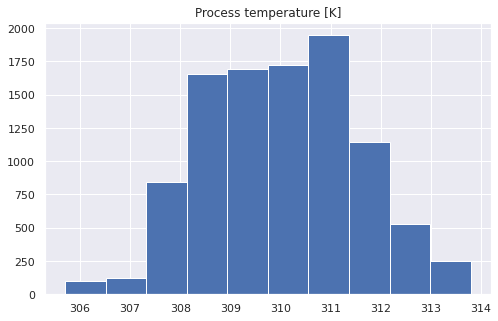

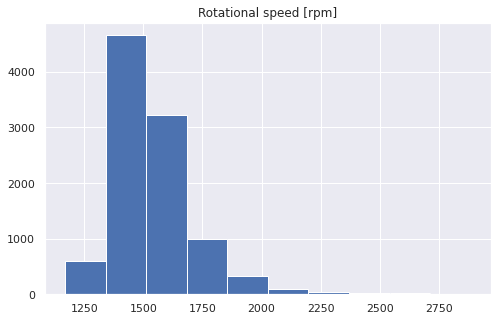

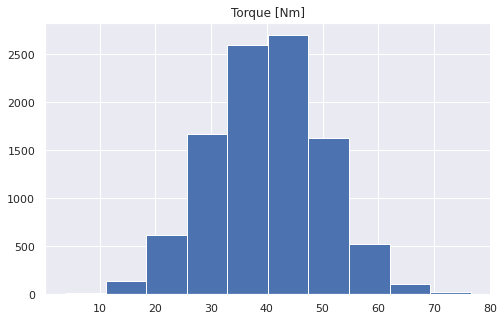

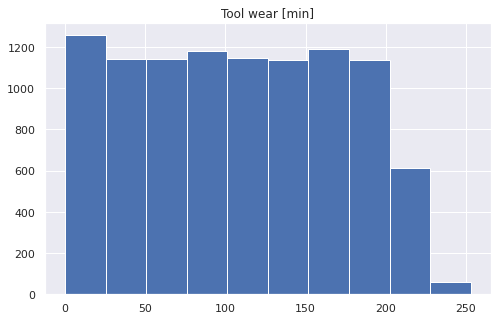

In [ ]:
#HISTOGRAM

for i in (features.columns):
  plt.figure()
  plt.title(f'{i}')
  plt.hist(features[i])

<function matplotlib.pyplot.show(close=None, block=None)>

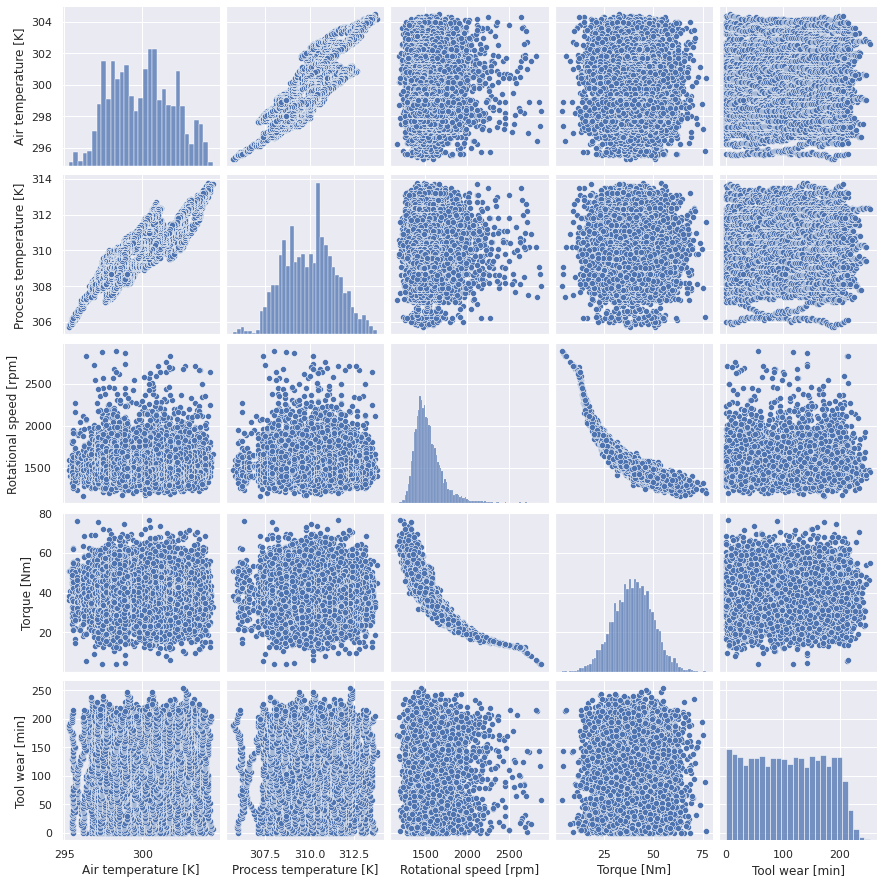

In [ ]:
#PAIRPLOT

sns.pairplot(features)
plt.show

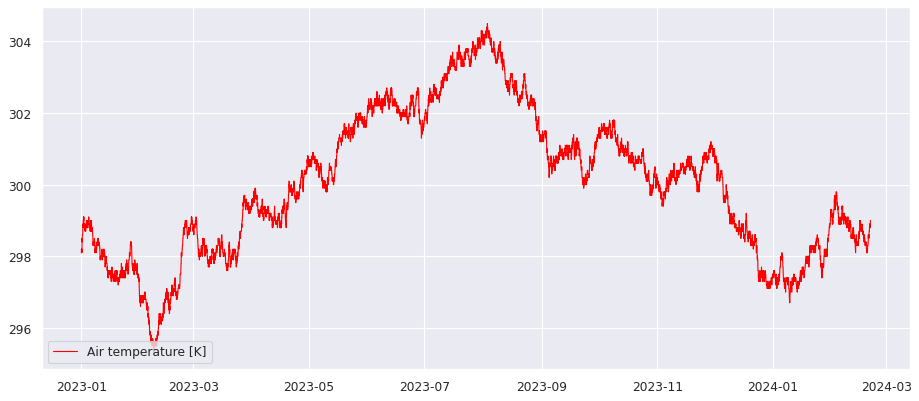

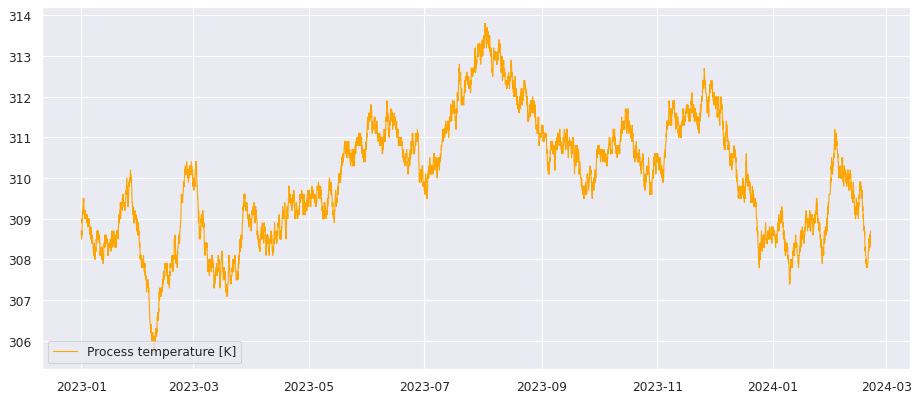

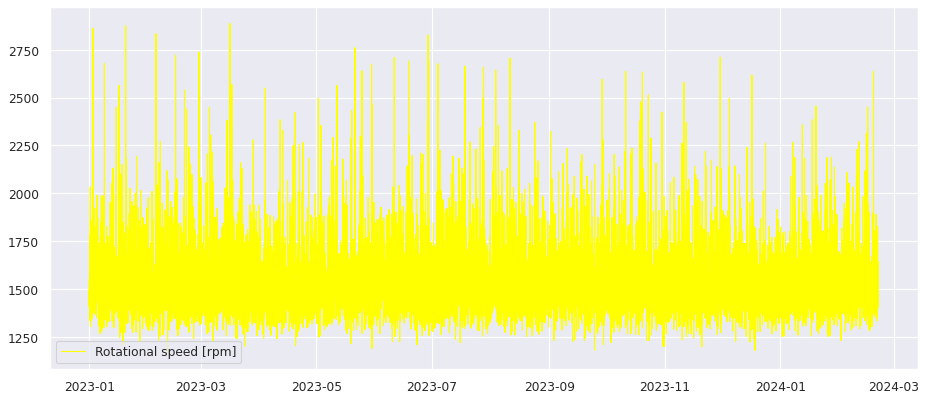

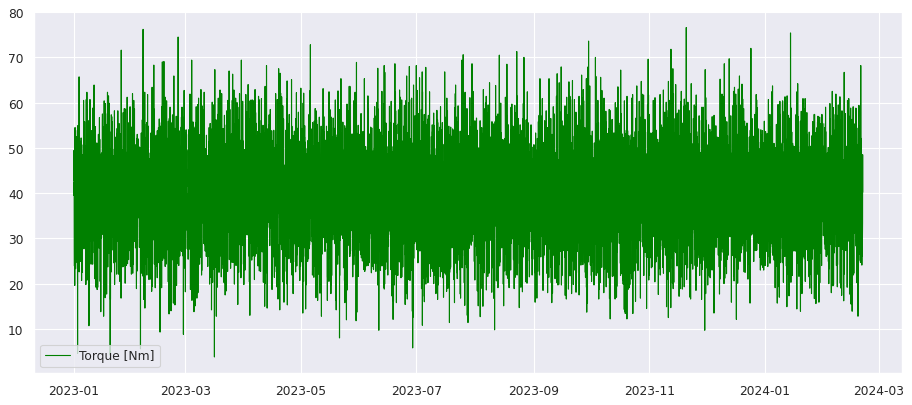

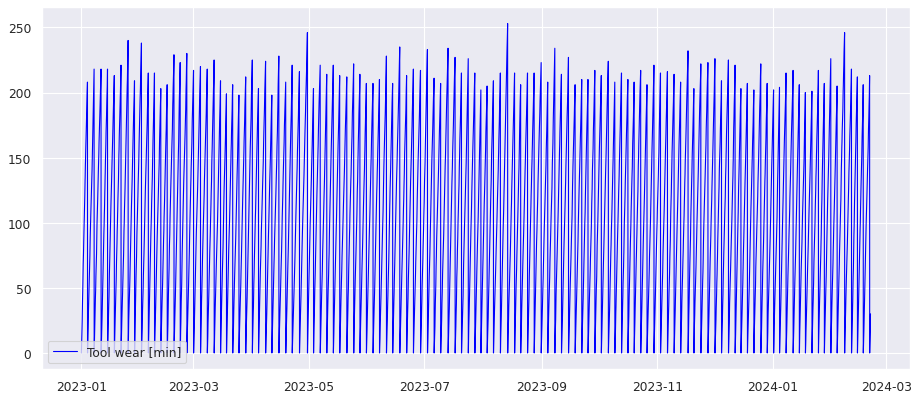

In [ ]:
#LINE CHART


c = ['red', 'orange', 'yellow', 'green', 'blue']
j=0

for i in features.columns:
  fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
  ax.plot(features[i], label=i, color=c[j], animated = True, linewidth=1)
  plt.legend(loc='lower left')
  plt.show()
  j=j+1

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
s_feature = scaler.fit_transform(features)

### Train Test Split

In [ ]:
train = s_feature[:7800,:]
test = s_feature[7800:,:]

In [ ]:
X_train = train.reshape(train.shape[0], 1, train.shape[1])
X_test = test.reshape(test.shape[0], 1, test.shape[1])

### Model

In [ ]:
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

In [ ]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

#### Loss = MAE

In [ ]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 5)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 16)             1408      
                                                                 
 lstm_1 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector (RepeatVector  (None, 1, 4)             0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 4)              144       
                                                                 
 lstm_3 (LSTM)               (None, 1, 16)             1344      
                                                             

In [ ]:
# fit the model to the data
nb_epochs = 100
batch_size = 10
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/100
741/741 [==============================] - 13s 10ms/step - loss: 0.1755 - val_loss: 0.1229
Epoch 2/100
741/741 [==============================] - 3s 4ms/step - loss: 0.0963 - val_loss: 0.1267
Epoch 3/100
741/741 [==============================] - 4s 5ms/step - loss: 0.0945 - val_loss: 0.1261
Epoch 4/100
741/741 [==============================] - 6s 9ms/step - loss: 0.0939 - val_loss: 0.1267
Epoch 5/100
741/741 [==============================] - 3s 4ms/step - loss: 0.0935 - val_loss: 0.1244
Epoch 6/100
741/741 [==============================] - 4s 6ms/step - loss: 0.0932 - val_loss: 0.1299
Epoch 7/100
741/741 [==============================] - 5s 6ms/step - loss: 0.0930 - val_loss: 0.1292
Epoch 8/100
741/741 [==============================] - 3s 4ms/step - loss: 0.0928 - val_loss: 0.1285
Epoch 9/100
741/741 [==============================] - 3s 4ms/step - loss: 0.0928 - val_loss: 0.1251
Epoch 10/100
741/741 [==============================] - 4s 6ms/step - loss: 0.0928 - val_

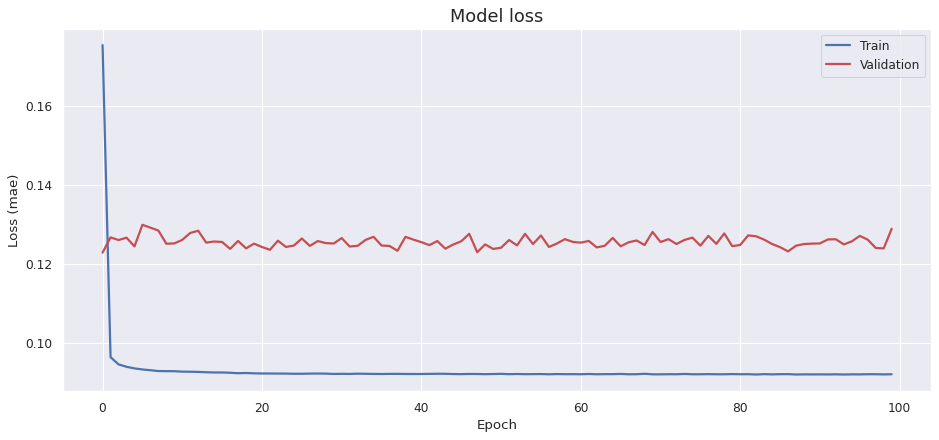

In [ ]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

244/244 [==============================] - 3s 9ms/step


(0.0, 0.5)

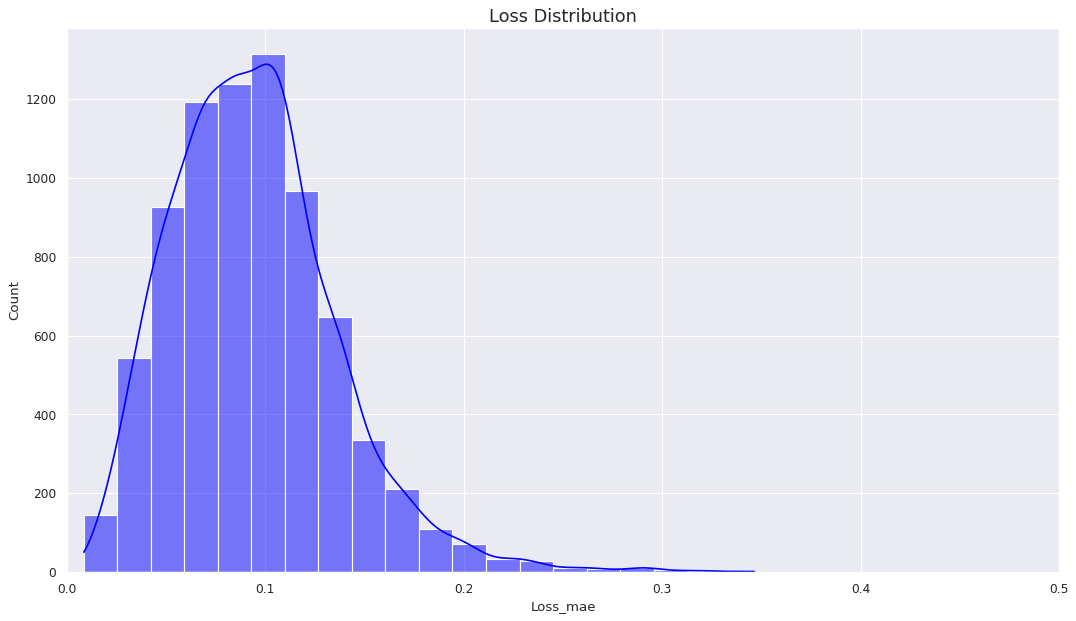

In [ ]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=features.columns)
X_pred.index = features.index[:7800]

scored = pd.DataFrame(index=features.index[:7800])
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.histplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.5])

In [ ]:
# calculate the loss on the test set
X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=features.columns)
X_pred.index = features.index[7800:]

scored = pd.DataFrame(index=features.index[7800:])
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = 0.15
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored

69/69 [==============================] - 0s 4ms/step


,Loss_mae,Threshold,Anomaly
2023-11-22 00:00:00,0.060461,0.15,False
2023-11-22 01:00:00,0.091396,0.15,False
2023-11-22 02:00:00,0.107108,0.15,False
2023-11-22 03:00:00,0.055790,0.15,False
2023-11-22 04:00:00,0.063258,0.15,False
...,...,...,...
2024-02-21 11:00:00,0.128655,0.15,False
2024-02-21 12:00:00,0.124753,0.15,False
2024-02-21 13:00:00,0.114460,0.15,False
2024-02-21 14:00:00,0.101762,0.15,False


#### Loss = MSE

In [ ]:
# create the autoencoder model
model1 = autoencoder_model(X_train)
model1.compile(optimizer='adam', loss='mse')
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 5)]            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 16)             1408      
                                                                 
 lstm_5 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector_1 (RepeatVect  (None, 1, 4)             0         
 or)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 1, 4)              144       
                                                                 
 lstm_7 (LSTM)               (None, 1, 16)             1344      
                                                           

In [ ]:
# fit the model to the data
nb_epochs = 100
batch_size = 10
history1 = model1.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/100
741/741 [==============================] - 10s 5ms/step - loss: 0.0832 - val_loss: 0.0261
Epoch 2/100
741/741 [==============================] - 3s 5ms/step - loss: 0.0361 - val_loss: 0.0259
Epoch 3/100
741/741 [==============================] - 4s 5ms/step - loss: 0.0361 - val_loss: 0.0261
Epoch 4/100
741/741 [==============================] - 4s 6ms/step - loss: 0.0361 - val_loss: 0.0272
Epoch 5/100
741/741 [==============================] - 3s 5ms/step - loss: 0.0361 - val_loss: 0.0261
Epoch 6/100
741/741 [==============================] - 3s 5ms/step - loss: 0.0361 - val_loss: 0.0267
Epoch 7/100
741/741 [==============================] - 5s 6ms/step - loss: 0.0361 - val_loss: 0.0261
Epoch 8/100
741/741 [==============================] - 3s 4ms/step - loss: 0.0361 - val_loss: 0.0267
Epoch 9/100
741/741 [==============================] - 3s 5ms/step - loss: 0.0361 - val_loss: 0.0259
Epoch 10/100
741/741 [==============================] - 3s 5ms/step - loss: 0.0361 - val_l

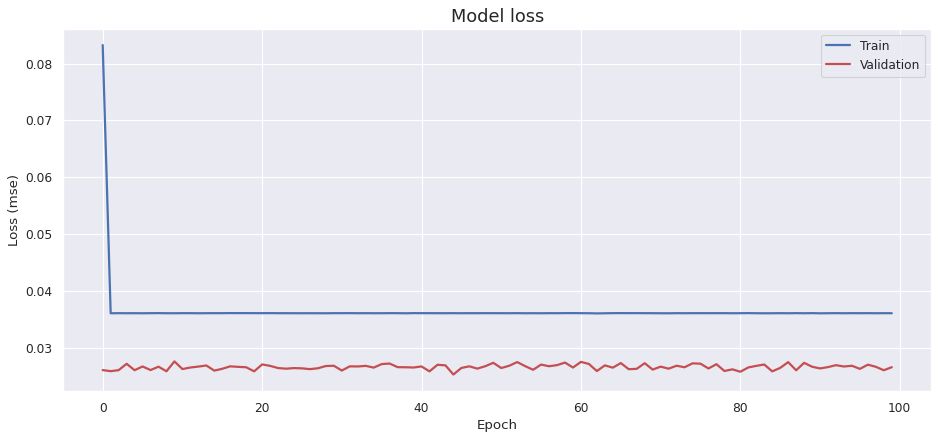

In [ ]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history1['loss'], 'b', label='Train', linewidth=2)
ax.plot(history1['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mse)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

244/244 [==============================] - 1s 2ms/step


(0.0, 0.5)

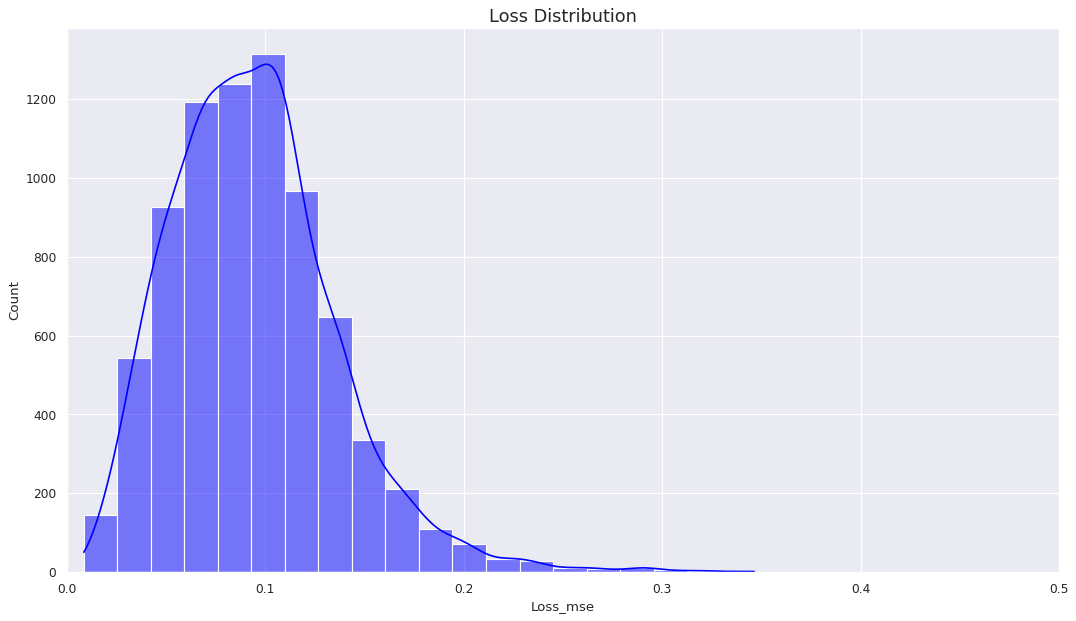

In [ ]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=features.columns)
X_pred.index = features.index[:7800]

scored = pd.DataFrame(index=features.index[:7800])
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mse'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.histplot(scored['Loss_mse'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.5])

In [ ]:
# calculate the loss on the test set
X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=features.columns)
X_pred.index = features.index[7800:]

scored = pd.DataFrame(index=features.index[7800:])
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mse'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = 0.15
scored['Anomaly'] = scored['Loss_mse'] > scored['Threshold']
scored

69/69 [==============================] - 0s 2ms/step


,Loss_mse,Threshold,Anomaly
2023-11-22 00:00:00,0.060461,0.15,False
2023-11-22 01:00:00,0.091396,0.15,False
2023-11-22 02:00:00,0.107108,0.15,False
2023-11-22 03:00:00,0.055790,0.15,False
2023-11-22 04:00:00,0.063258,0.15,False
...,...,...,...
2024-02-21 11:00:00,0.128655,0.15,False
2024-02-21 12:00:00,0.124753,0.15,False
2024-02-21 13:00:00,0.114460,0.15,False
2024-02-21 14:00:00,0.101762,0.15,False


#### Loss = Huber loss


In [ ]:
loss = keras.losses.Huber()

In [ ]:
# create the autoencoder model
model2 = autoencoder_model(X_train)
model2.compile(optimizer='adam', loss=loss)
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 5)]            0         
                                                                 
 lstm_8 (LSTM)               (None, 1, 16)             1408      
                                                                 
 lstm_9 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector_2 (RepeatVect  (None, 1, 4)             0         
 or)                                                             
                                                                 
 lstm_10 (LSTM)              (None, 1, 4)              144       
                                                                 
 lstm_11 (LSTM)              (None, 1, 16)             1344      
                                                           

In [ ]:
# fit the model to the data
nb_epochs = 100
batch_size = 10
history2 = model2.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/100
741/741 [==============================] - 10s 7ms/step - loss: 0.0265 - val_loss: 0.0112
Epoch 2/100
741/741 [==============================] - 3s 4ms/step - loss: 0.0103 - val_loss: 0.0116
Epoch 3/100
741/741 [==============================] - 3s 4ms/step - loss: 0.0097 - val_loss: 0.0090
Epoch 4/100
741/741 [==============================] - 4s 6ms/step - loss: 0.0045 - val_loss: 0.0054
Epoch 5/100
741/741 [==============================] - 4s 5ms/step - loss: 0.0037 - val_loss: 0.0058
Epoch 6/100
741/741 [==============================] - 3s 4ms/step - loss: 0.0036 - val_loss: 0.0054
Epoch 7/100
741/741 [==============================] - 3s 4ms/step - loss: 0.0035 - val_loss: 0.0054
Epoch 8/100
741/741 [==============================] - 5s 7ms/step - loss: 0.0034 - val_loss: 0.0055
Epoch 9/100
741/741 [==============================] - 4s 5ms/step - loss: 0.0034 - val_loss: 0.0057
Epoch 10/100
741/741 [==============================] - 3s 4ms/step - loss: 0.0034 - val_l

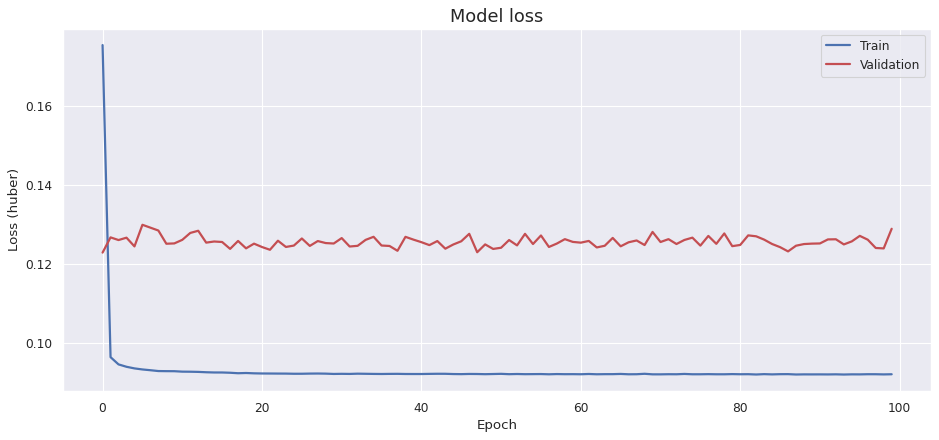

In [ ]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (huber)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

244/244 [==============================] - 1s 2ms/step


(0.0, 0.5)

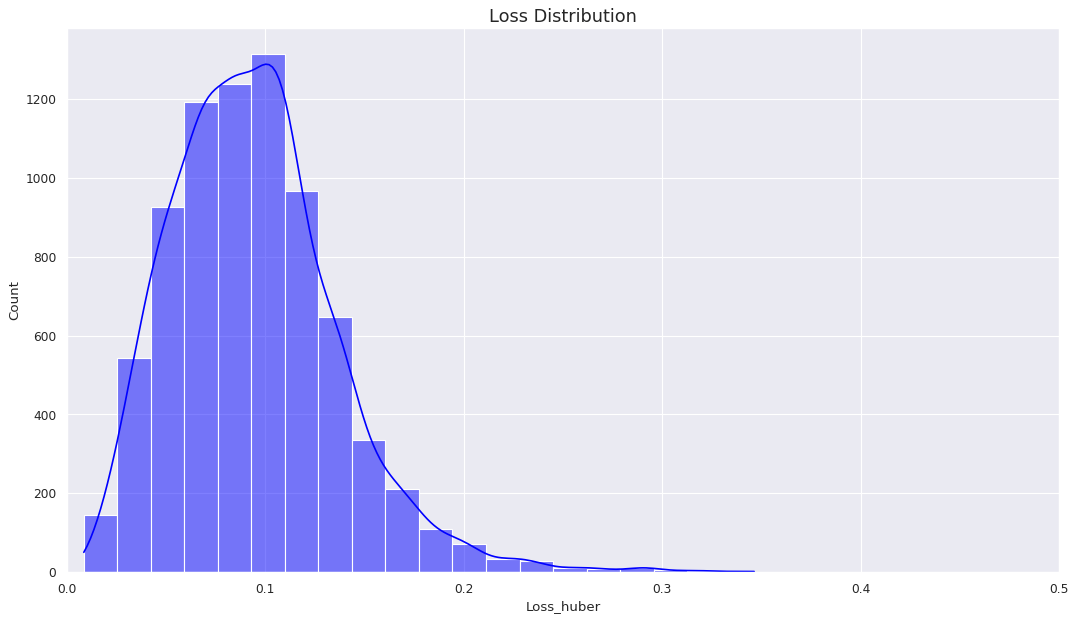

In [ ]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=features.columns)
X_pred.index = features.index[:7800]

scored = pd.DataFrame(index=features.index[:7800])
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_huber'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.histplot(scored['Loss_huber'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.5])

In [ ]:
# calculate the loss on the test set
X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=features.columns)
X_pred.index = features.index[7800:]

scored = pd.DataFrame(index=features.index[7800:])
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_huber'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = 0.15
scored['Anomaly'] = scored['Loss_huber'] > scored['Threshold']
scored

69/69 [==============================] - 0s 2ms/step


,Loss_huber,Threshold,Anomaly
2023-11-22 00:00:00,0.060461,0.15,False
2023-11-22 01:00:00,0.091396,0.15,False
2023-11-22 02:00:00,0.107108,0.15,False
2023-11-22 03:00:00,0.055790,0.15,False
2023-11-22 04:00:00,0.063258,0.15,False
...,...,...,...
2024-02-21 11:00:00,0.128655,0.15,False
2024-02-21 12:00:00,0.124753,0.15,False
2024-02-21 13:00:00,0.114460,0.15,False
2024-02-21 14:00:00,0.101762,0.15,False
